In [6]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('data/tweets/tweets_labelled_09042020_16072020.csv',sep = ';').set_index('id').iloc[:,1:]
data

,text,sentiment
id,,
77522,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
661634,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
413231,Net issuance increases to fund fiscal programs...,positive
760262,RT @bentboolean: How much of Amazon's traffic ...,positive
830153,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...
411380,"With ad revenues falling, what’s the impact on...",NaN
62318,RT @KelvinSCWong: Well another point to add to...,NaN
627230,$ITOX working on a contract with a fortune 500...,NaN


In [8]:
import collections
import re


In [9]:
ticker_pattern = re.compile(r'(^\$[A-Z]+|^\$ES_F)')
ht_pattern = re.compile(r'#\w+')

ticker_dic = collections.defaultdict(int)
ht_dic = collections.defaultdict(int)

for text in data['text']:
    for word in text.split():
        if ticker_pattern.fullmatch(word) is not None:
            ticker_dic[word[1:]] += 1
        
        word = word.lower()
        if ht_pattern.fullmatch(word) is not None:
            ht_dic[word] += 1


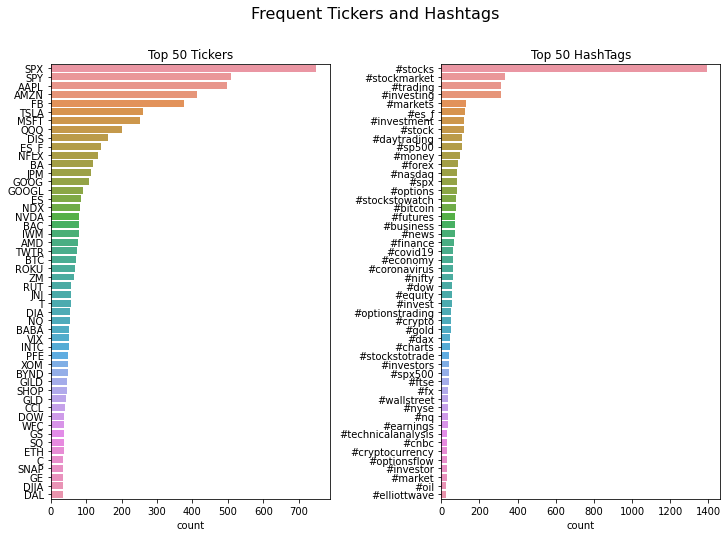

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
ticker_df = pd.DataFrame.from_dict(
    ticker_dic, orient='index').rename(columns={0:'count'})\
    .sort_values('count', ascending=False).head(50)
    
ht_df = pd.DataFrame.from_dict(
    ht_dic, orient='index').rename(columns={0:'count'})\
    .sort_values('count', ascending=False).head(50)

fig, ax = plt.subplots(1, 2, figsize=(12,8))
plt.suptitle('Frequent Tickers and Hashtags', fontsize=16)
plt.subplots_adjust(wspace=0.4)

sns.barplot(x=ticker_df['count'], y=ticker_df.index, orient='h', ax=ax[0])
ax[0].set_title('Top 50 Tickers')

sns.barplot(x=ht_df['count'], y=ht_df.index, orient='h', ax=ax[1])
ax[1].set_title('Top 50 HashTags')

plt.show()

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
charonly = re.compile(r'[^a-zA-Z\s]')
handle_pattern = re.compile(r'@\w+')
emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
url_pattern = re.compile(
    'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
pic_pattern = re.compile('pic\.twitter\.com/.{10}')
special_code = re.compile(r'(&amp;|&gt;|&lt;)')
tag_pattern = re.compile(r'<.*?>')

STOPWORDS = set(stopwords.words('english')).union(
    {'rt', 'retweet', 'RT', 'Retweet', 'RETWEET'})

lemmatizer = WordNetLemmatizer()

def hashtag(phrase):
    return ht_pattern.sub(' ', phrase)

def remove_ticker(phrase):
    return ticker_pattern.sub('', phrase)
    
def specialcode(phrase):
    return special_code.sub(' ', phrase)

def emoji(phrase):
    return emoji_pattern.sub(' ', phrase)

def url(phrase):
    return url_pattern.sub('', phrase)

def pic(phrase):
    return pic_pattern.sub('', phrase)

def html_tag(phrase):
    return tag_pattern.sub(' ', phrase)

def handle(phrase):
    return handle_pattern.sub('', phrase)

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # DIS, ticker symbol of Disney, is interpreted as the plural of "DI" 
    # in WordCloud, so I converted it to Disney
    phrase = re.sub('DIS', 'Disney', phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"(he|He)\'s", "he is", phrase)
    phrase = re.sub(r"(she|She)\'s", "she is", phrase)
    phrase = re.sub(r"(it|It)\'s", "it is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"(\'ve|has)", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def onlychar(phrase):
    return charonly.sub('', phrase)

def remove_stopwords(phrase):
    return " ".join([word for word in str(phrase).split()\
                     if word not in STOPWORDS])

def tokenize_stem(phrase):   
    tokens = word_tokenize(phrase)
    stem_words =[]
    for token in tokens:
        word = lemmatizer.lemmatize(token)
        stem_words.append(word)        
    buf = ' '.join(stem_words)    
    return buf


In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
def arrange_text(ds):
    ds['text2'] = ds['text'].apply(emoji)
    ds['text2'] = ds['text2'].apply(handle)
    ds['text2'] = ds['text2'].apply(specialcode)
    ds['text2'] = ds['text2'].apply(hashtag)
    ds ['text2'] = ds['text2'].apply(url)
    ds['text2'] = ds['text2'].apply(pic)
    ds['text2'] = ds['text2'].apply(html_tag)
    ds['text2'] = ds['text2'].apply(onlychar)
    ds['text2'] = ds['text2'].apply(decontracted)
    ds['text2'] = ds['text2'].apply(onlychar)
    ds['text2'] = ds['text2'].apply(tokenize_stem)
    ds['text2'] = ds['text2'].apply(remove_stopwords)

In [15]:
arrange_text(data)


In [16]:
from wordcloud import WordCloud

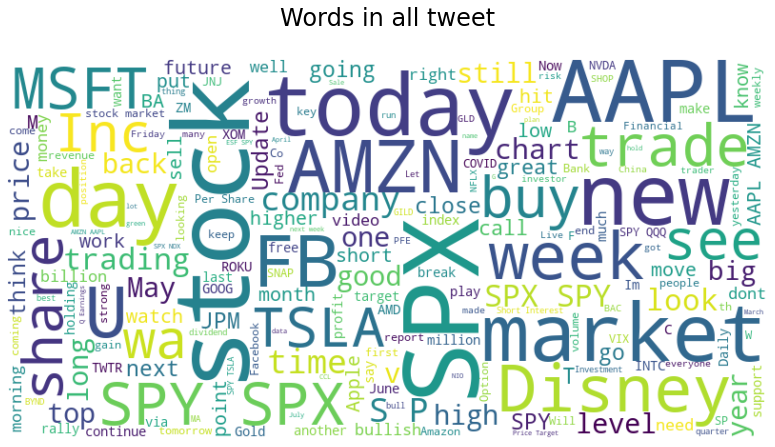

In [17]:
words = ' '.join([text for text in data['text2']])
wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_font_size=110)\
    .generate(words)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in all tweet\n', fontsize=24)
plt.axis('off')
plt.show()

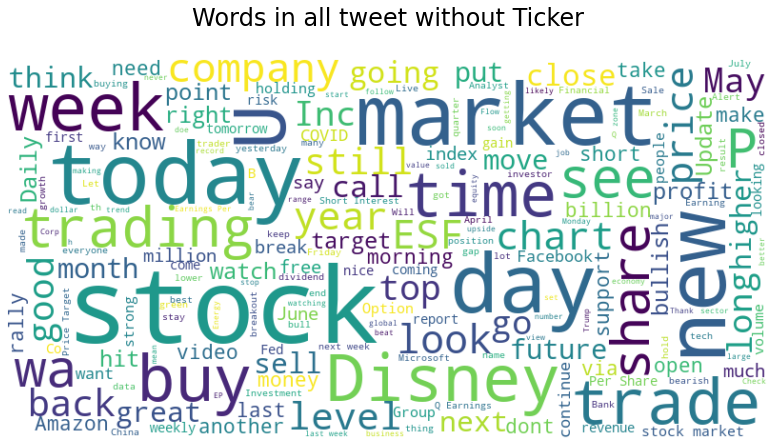

In [18]:
not_ticker = [] # list of words except for Ticker

for text in data['text2']:
    for word in text.split():
        if word.upper() not in ticker_dic:
            not_ticker.append(word)
            
words = ' '.join([word for word in not_ticker])
wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_font_size=110).\
    generate(words)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in all tweet without Ticker\n', fontsize=24)
plt.axis('off')
plt.show()

# Machine Learning

In [48]:
data = pd.read_csv('data/tweets/tweets_labelled_09042020_16072020.csv',sep = ';').set_index('id').iloc[:,1:]
data

,text,sentiment
id,,
77522,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
661634,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
413231,Net issuance increases to fund fiscal programs...,positive
760262,RT @bentboolean: How much of Amazon's traffic ...,positive
830153,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...
411380,"With ad revenues falling, what’s the impact on...",NaN
62318,RT @KelvinSCWong: Well another point to add to...,NaN
627230,$ITOX working on a contract with a fortune 500...,NaN


In [49]:
data.isnull().sum()

text            0
sentiment    3700
dtype: int64

In [50]:
data = data.dropna(subset = ['sentiment'])
data

,text,sentiment
id,,
77522,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
661634,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
413231,Net issuance increases to fund fiscal programs...,positive
760262,RT @bentboolean: How much of Amazon's traffic ...,positive
830153,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...
75519,#stocks back from the recovery room: https://t...,positive
739234,RT @MacroCharts: Breadth – expanding last week...,positive
254379,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral


In [51]:
data['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [52]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]


Text(0.5, 1.0, 'Dataset labels distribuition')

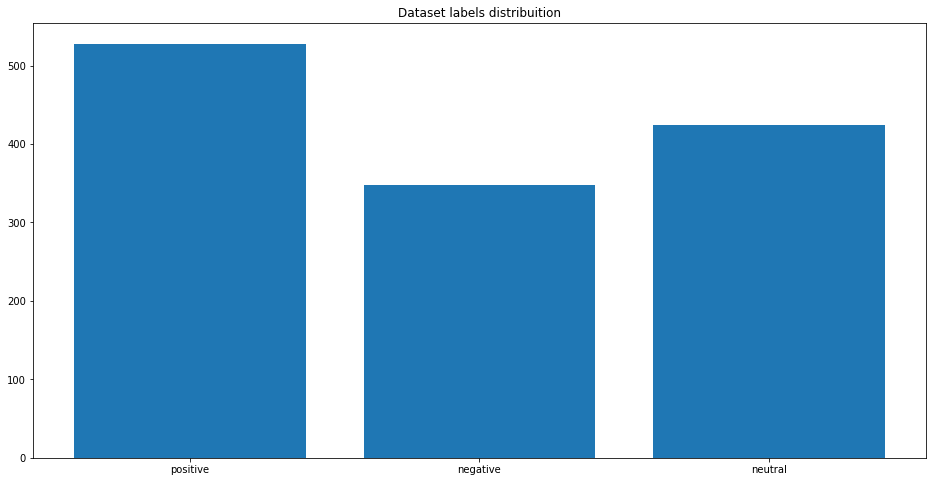

In [53]:
from collections import Counter

target_cnt = Counter(data.sentiment)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [54]:
from nltk.stem import SnowballStemmer
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [55]:
text_cleaner = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess_text(text, stem=False):

    text = re.sub(text_cleaner, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)


In [56]:
%%time
import re
data.text = data.text.apply(lambda x: preprocess_text(x))

Wall time: 107 ms


c:\users\kk\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.1, random_state=9)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 1170
TEST size: 130


# Creating Word2Vec

In [58]:
%%time
documents = [_text.split() for _text in df_train.text] 

Wall time: 5 ms


In [59]:
# WORD2VEC 
import gensim
word2vec_size = 300
word2vec_window = 7
word2vec_epoch = 32
word2vec_min_count = 10
word2vec_model = gensim.models.word2vec.Word2Vec(vector_size=word2vec_size, 
                                            window=word2vec_window, 
                                            min_count=word2vec_min_count, 
                                            workers=8)

In [60]:
word2vec_model.build_vocab(documents)

In [61]:
#words = word2vec_model.wv.vocab.keys()
words = word2vec_model.wv.key_to_index.keys()

vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 331


In [62]:
%%time
word2vec_model.train(documents, total_examples=len(documents), epochs=word2vec_epoch)

Wall time: 629 ms


(203820, 621856)

In [63]:
word2vec_model.wv.most_similar("today")

[('far', 0.992271363735199),
 ('members', 0.9919965267181396),
 ('via', 0.9899199604988098),
 ('200', 0.9895817637443542),
 ('buying', 0.9894611835479736),
 ('hit', 0.9893798828125),
 ('people', 0.9892469048500061),
 ('lost', 0.9889890551567078),
 ('move', 0.9887506365776062),
 ('friday', 0.9876752495765686)]

In [64]:
word2vec_model.wv.most_similar("stocks")

[('nifty', 0.979986310005188),
 ('stockstowatch', 0.9709289073944092),
 ('equity', 0.9692468643188477),
 ('stock', 0.9601502418518066),
 ('invest', 0.9587582945823669),
 ('investor', 0.9576205015182495),
 ('stockmarket', 0.9560263752937317),
 ('interest', 0.9464036822319031),
 ('shares', 0.9455306529998779),
 ('score', 0.9441297054290771)]

# Tokenizing the Text

In [65]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [68]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 5902
Wall time: 51 ms


In [69]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
%%time
length_sequence = 300
EPOCHS = 8
BATCH_SIZE = 1024
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=length_sequence)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=length_sequence)

Wall time: 39 ms


In [42]:
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
labels = df_train.sentiment.unique().tolist()
labels

['negative', 'positive', 'neutral']

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_train.sentiment.tolist())

y_train = encoder.transform(df_train.sentiment.tolist())
y_test = encoder.transform(df_test.sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)


y_train (1170, 1)
y_test (130, 1)


In [44]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)

print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1170, 300)
y_train (1170, 1)
x_test (130, 300)
y_test (130, 1)


In [47]:
x_train.max()

5901

In [45]:
embedding_matrix = np.zeros((vocab_size, word2vec_size))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]
print(embedding_matrix.shape)


(5902, 300)


In [46]:
embedding_layer = Embedding(vocab_size, word2vec_size, weights=[embedding_matrix], input_length=length_sequence, trainable=False)

In [120]:
# Import various layers needed for the architecture from keras
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
# The Input layer 
sequence_input = Input(shape=(300,), dtype='int32')
# Inputs passed to the embedding layer
embedding_sequences = embedding_layer(sequence_input)
# dropout and conv layer 
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(300, 5, activation='relu')(x)
# Passed on to the LSTM layer
x = Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(70, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(30, activation='relu')(x)
# Passed on to activation layer to get final output
outputs = Dense(3, activation='softmax')(x)
model = Model(sequence_input, outputs)

In [121]:
'''
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(170 ,return_sequences = True,activation ='tanh'))
model.add(LSTM(170 ,return_sequences = True))
model.add(LSTM(120 ,return_sequences = True))
model.add(LSTM(85 ,return_sequences = True))
model.add(LSTM(50 ,return_sequences = True))
model.add(LSTM(25))
model.add(Dense(3, activation='softmax'))

model.summary()
'''

"\nmodel = Sequential()\nmodel.add(embedding_layer)\nmodel.add(LSTM(170 ,return_sequences = True,activation ='tanh'))\nmodel.add(LSTM(170 ,return_sequences = True))\nmodel.add(LSTM(120 ,return_sequences = True))\nmodel.add(LSTM(85 ,return_sequences = True))\nmodel.add(LSTM(50 ,return_sequences = True))\nmodel.add(LSTM(25))\nmodel.add(Dense(3, activation='softmax'))\n\nmodel.summary()\n"

In [122]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


In [123]:
#callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
#              EarlyStopping(monitor='accuracy', min_delta=1e-4, patience=5)]

In [44]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=300,
                    epochs=100,
                    validation_split=0.3,
                    verbose=1,
                 )

Epoch 1/100
3/3 [==============================] - 64s 19s/step - loss: 1.1003 - accuracy: 0.3346 - val_loss: 1.0886 - val_accuracy: 0.3989
Epoch 2/100
3/3 [==============================] - 58s 18s/step - loss: 1.0844 - accuracy: 0.3968 - val_loss: 1.0769 - val_accuracy: 0.4103
Epoch 3/100
3/3 [==============================] - 56s 18s/step - loss: 1.0894 - accuracy: 0.3919 - val_loss: 1.0742 - val_accuracy: 0.3989
Epoch 4/100
3/3 [==============================] - 53s 18s/step - loss: 1.0794 - accuracy: 0.4164 - val_loss: 1.0765 - val_accuracy: 0.4245
Epoch 5/100
3/3 [==============================] - 52s 18s/step - loss: 1.0774 - accuracy: 0.4078 - val_loss: 1.0768 - val_accuracy: 0.4103
Epoch 6/100
3/3 [==============================] - 52s 17s/step - loss: 1.0763 - accuracy: 0.4237 - val_loss: 1.0786 - val_accuracy: 0.4131
Epoch 7/100
3/3 [==============================] - 51s 17s/step - loss: 1.0698 - accuracy: 0.4383 - val_loss: 1.0823 - val_accuracy: 0.4131
Epoch 8/100
3/3 [===

In [49]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1/1 [==============================] - 2s 2s/step - loss: 2.5226 - accuracy: 0.4077

ACCURACY: 0.4076923131942749
LOSS: 2.5225977897644043
CPU times: user 3.62 s, sys: 242 ms, total: 3.86 s
Wall time: 3.45 s


# Prediction

In [47]:
model.save('nlpmodel.h5')

In [3]:
from tensorflow.keras.models import load_model

In [124]:
model = load_model('nlpmodel.h5')

In [131]:
output=model.predict(x_test[0:5])

In [133]:
output

array([[0.96700084],
       [0.92048407],
       [0.9317869 ],
       [0.9676191 ],
       [0.8350791 ]], dtype=float32)